In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("diamonds.csv")

In [3]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [4]:
df.shape

(53940, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
df.duplicated().sum()

0

In [8]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

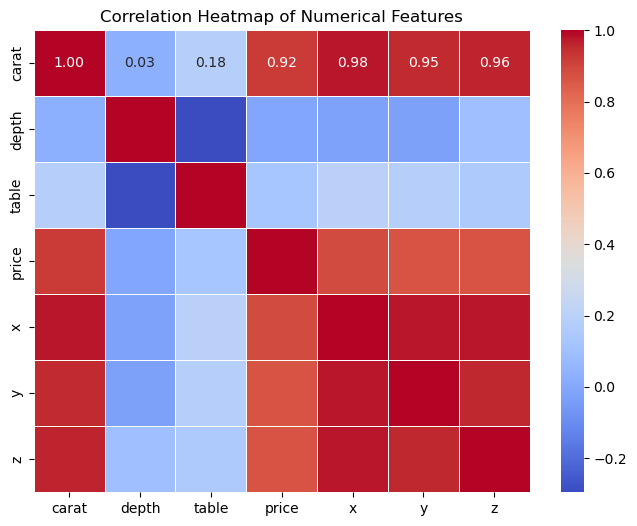

In [11]:
corr = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

This plot visually represents the correlation matrix of the numerical features in your DataFrame. The colors indicate the strength and direction of the correlation between pairs of features.

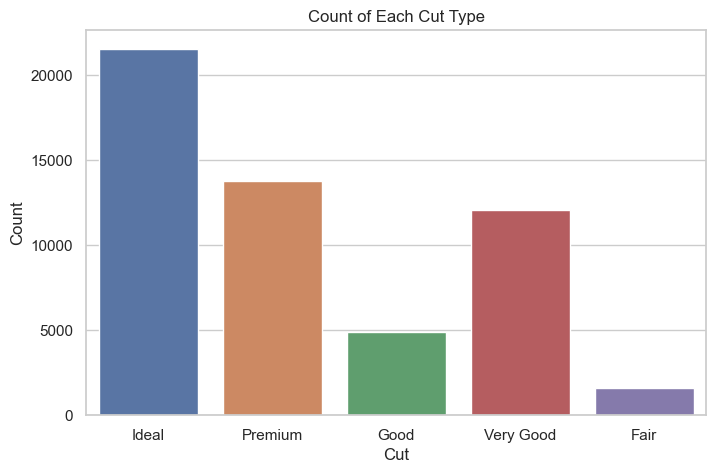

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='cut')
plt.title("Count of Each Cut Type")
plt.xlabel("Cut")
plt.ylabel("Count")
plt.show()

This bar plot shows the frequency of each diamond cut category (Fair, Good, Very Good, Premium, Ideal) in your dataset.

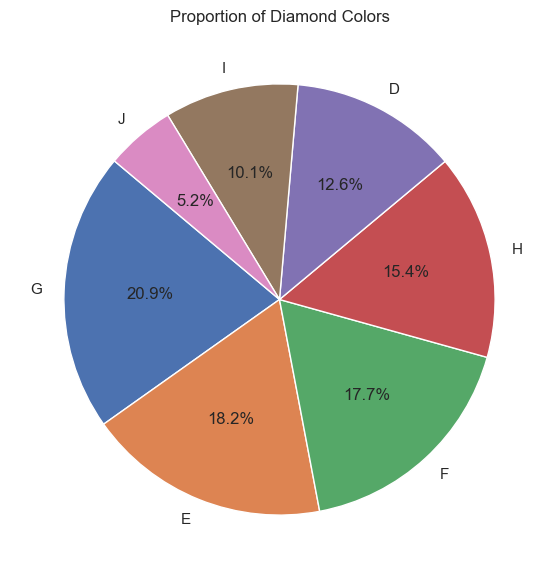

In [13]:
color_counts = df['color'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(color_counts, labels=color_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Diamond Colors")
plt.show()

This pie chart illustrates the distribution of diamond colors (D, E, F, G, H, I, J) as a proportion of the whole dataset.

C:\Users\Divya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


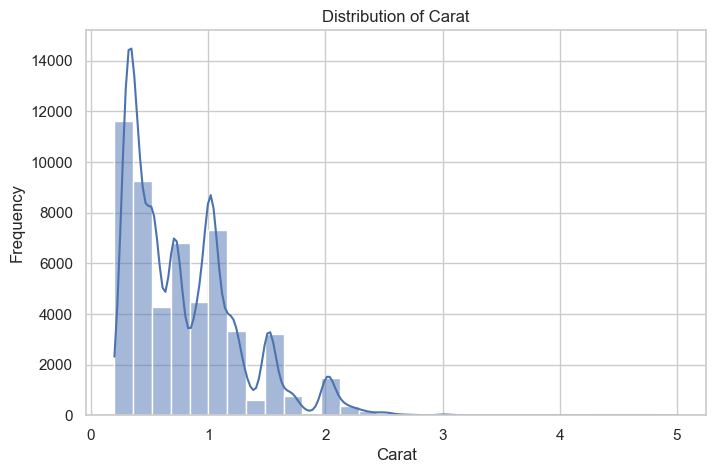

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(df['carat'], bins=30, kde=True)
plt.title("Distribution of Carat")
plt.xlabel("Carat")
plt.ylabel("Frequency")
plt.show()

This histogram shows the frequency distribution of the 'carat' feature, giving you an idea of how the carat weights are distributed across your dataset.

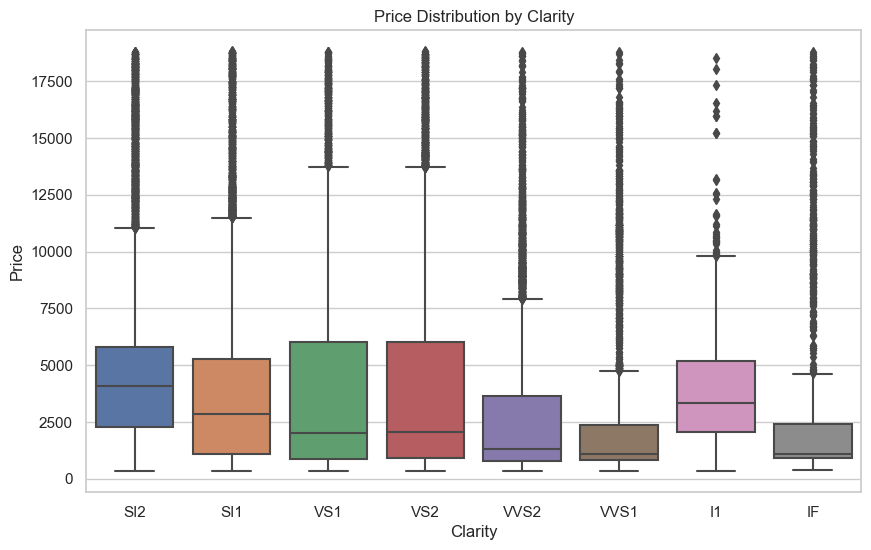

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='clarity', y='price')
plt.title("Price Distribution by Clarity")
plt.xlabel("Clarity")
plt.ylabel("Price")
plt.show()

These box plots compare the distribution of diamond prices across different clarity levels. This helps to see how price varies with clarity.

C:\Users\Divya\AppData\Local\Temp\ipykernel_25272\3490081911.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(bins)['price'].mean().reset_index()


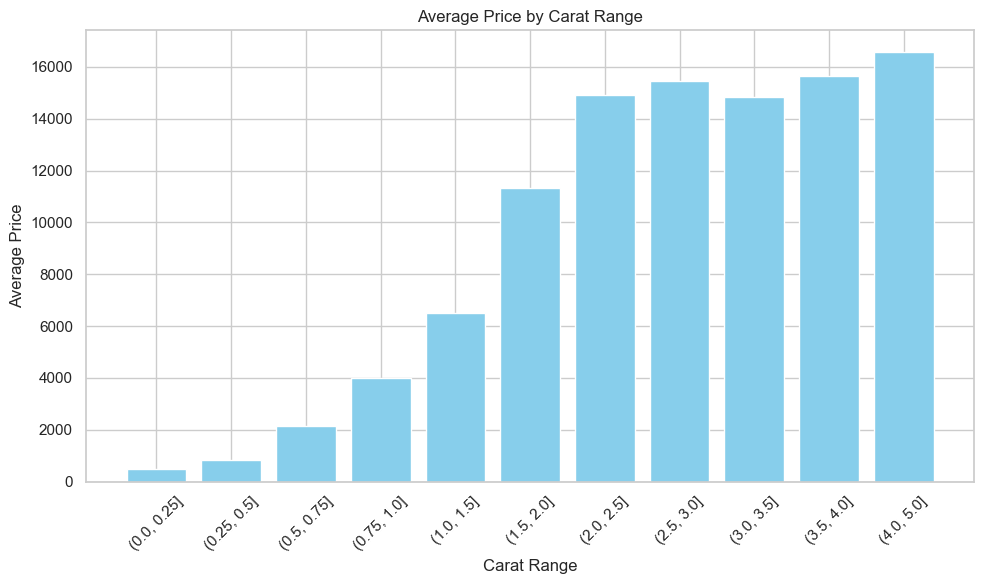

In [16]:
bins = pd.cut(df['carat'], bins=[0, 0.25, 0.5, 0.75, 1, 1.5, 2, 2.5, 3, 3.5, 4, 5])
grouped = df.groupby(bins)['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(grouped['carat'].astype(str), grouped['price'], color='skyblue')
plt.xticks(rotation=45)
plt.title("Average Price by Carat Range")
plt.xlabel("Carat Range")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()

This bar chart shows the average price of diamonds within specific carat ranges, allowing you to see how average price changes as carat increases

In [17]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le



In [19]:
X = df.drop('price', axis=1)
y = df['price']

In [20]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

r2_knn = r2_score(y_test, y_pred_knn)
rmse_knn = mean_squared_error(y_test, y_pred_knn) ** 0.5

print(f"KNN - R2 Score: {r2_knn:.4f}")
print(f"KNN - RMSE: {rmse_knn:.2f}")


KNN - R2 Score: 0.9595
KNN - RMSE: 805.64


In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr) ** 0.5

print(f"Linear Regression - R2 Score: {r2_lr:.4f}")
print(f"Linear Regression - RMSE: {rmse_lr:.2f}")


Linear Regression - R2 Score: 0.8895
Linear Regression - RMSE: 1331.04


In [24]:
from sklearn.svm import SVR

svm = SVR()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

r2_svm = r2_score(y_test, y_pred_svm)
rmse_svm = mean_squared_error(y_test, y_pred_svm) ** 0.5

print(f"SVM - R2 Score: {r2_svm:.4f}")
print(f"SVM - RMSE: {rmse_svm:.2f}")


SVM - R2 Score: 0.5051
SVM - RMSE: 2816.91


In [25]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt) ** 0.5

print(f"Decision Tree - R2 Score: {r2_dt:.4f}")
print(f"Decision Tree - RMSE: {rmse_dt:.2f}")


Decision Tree - R2 Score: 0.9673
Decision Tree - RMSE: 723.75


In [26]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf) ** 0.5

print(f"Random Forest - R2 Score: {r2_rf:.4f}")
print(f"Random Forest - RMSE: {rmse_rf:.2f}")


Random Forest - R2 Score: 0.9831
Random Forest - RMSE: 520.30


In [27]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

r2_ada = r2_score(y_test, y_pred_ada)
rmse_ada = mean_squared_error(y_test, y_pred_ada) ** 0.5

print(f"AdaBoost - R2 Score: {r2_ada:.4f}")
print(f"AdaBoost - RMSE: {rmse_ada:.2f}")


AdaBoost - R2 Score: 0.8926
AdaBoost - RMSE: 1311.98


In [28]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb) ** 0.5

print(f"Gradient Boost - R2 Score: {r2_gb:.4f}")
print(f"Gradient Boost - RMSE: {rmse_gb:.2f}")


Gradient Boost - R2 Score: 0.9721
Gradient Boost - RMSE: 669.39


In [29]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb) ** 0.5

print(f"XGBoost - R2 Score: {r2_xgb:.4f}")
print(f"XGBoost - RMSE: {rmse_xgb:.2f}")


XGBoost - R2 Score: 0.9822
XGBoost - RMSE: 533.76


C:\Users\Divya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


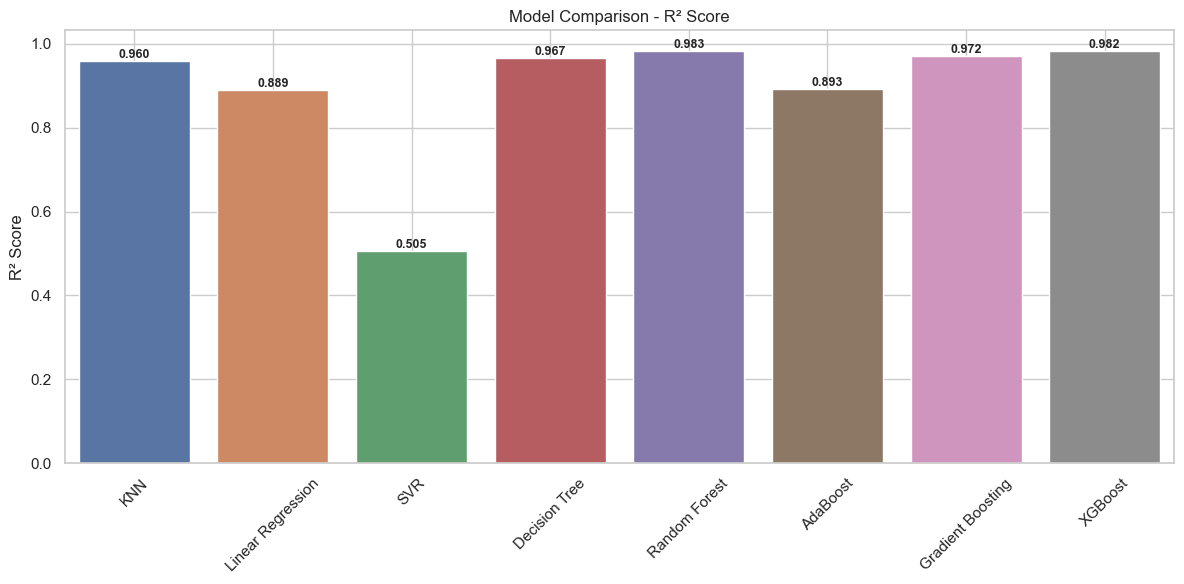

In [30]:

model_names = [
    "KNN", "Linear Regression",
    "SVR", "Decision Tree", "Random Forest", "AdaBoost",
    "Gradient Boosting", "XGBoost"
]

r2_scores = [
    r2_knn, r2_lr,
    r2_svm, r2_dt, r2_rf, r2_ada,
    r2_gb, r2_xgb
]

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=model_names, y=r2_scores)
plt.ylabel("R² Score")
plt.title("Model Comparison - R² Score")
plt.xticks(rotation=45)
plt.grid(True)

for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.3f}",
        ha="center",
        va="bottom",
        fontweight="bold",
        fontsize=9
    )

plt.tight_layout()
plt.show()


This bar plot visually compares the R-squared scores of all the trained regression models, making it easy to see which model performed best in terms of explained variance.